# Problem Formulation

The idea of this project is to analyse the sentiment of the Tweets in a given topic from Twitter data using Tweepy and Python. This is really helpful for any organizations that need to know, for example, what their customers feel about their new products.

# ETL

## Extract and load data

In [1]:
import pandas as pd

#read data and assign it to dataframe df
df = pd.read_csv('/Users/linhnguyen/Desktop/tweets_sentiment.csv')

#check 5 first lines of the dataset
print(df.head(5))

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [2]:
#remove unnecessary columns

df = df[['target','text']]
print(df.head(5))

#change the target values from 0 and 1 to 'Negative' and 'Positive' respectively

df['target'] = df['target'].replace([0,1],['Negative','Positive'])
print(df.head(5))


   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....
     target                                               text
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  Negative  is upset that he can't update his Facebook by ...
2  Negative  @Kenichan I dived many times for the ball. Man...
3  Negative    my whole body feels itchy and like its on fire 
4  Negative  @nationwideclass no, it's not behaving at all....


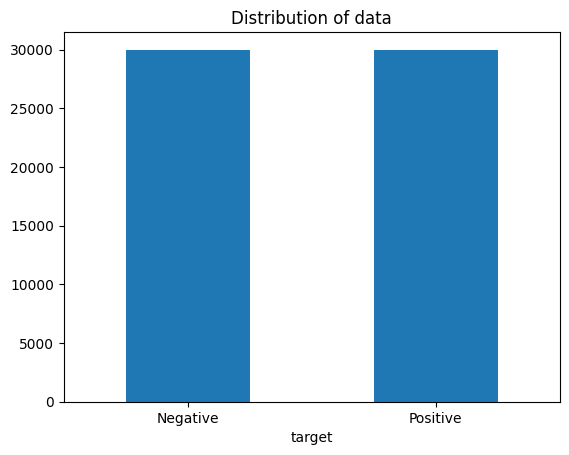

In [3]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

## Data cleaning

In [4]:
import re
import nltk #Natural Language Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(textdata):
    cleaned_text =[]
    stop = list(stopwords.words("english"))
    # Defining dictionary containing all emojis with their meanings.
    emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
    
    for tweet in textdata:
        tweet = tweet.lower() #Converting to lowercase
        tweet = re.sub('http://\S+|https://\S+', '', tweet) #Removing url
        tweet = re.sub('@[^\s]+','user', tweet) #Changing @username to user
        tweet = re.sub(r"[^\w\s]", " ", tweet) #Removing punctuation
        tweet = ''.join([i for i in tweet if not i.isdigit()])  # Removing numbers
        tweet = re.sub(r'\b\w\b', ' ', tweet)  # Removing single-letter words
        tweet = re.sub(r" +", " ", tweet) #Removing multiple-whitespaces
        tweet = tweet.strip()  #Removing leading and whitepaces
        tweet = ' '.join([word for word in tweet.split() if word not in stop])  #Removing stopwords
        tweet = ' '.join([word for word in tweet.split() if word not in emojis])  #Removing emojis
        cleaned_text.append(tweet)
    return cleaned_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linhnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import time
t = time.time()
cleaned_text = clean_text(text)
print(f'Text cleaning complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')
print(cleaned_text[0:5])
df['cleaned_text'] = cleaned_text
print(df.head(5))

Text cleaning complete.
Time Taken: 2 seconds
['user awww bummer shoulda got david carr third day', 'upset update facebook texting might cry result school today also blah', 'user dived many times ball managed save rest go bounds', 'whole body feels itchy like fire', 'user behaving mad see']
     target                                               text  \
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  Negative  is upset that he can't update his Facebook by ...   
2  Negative  @Kenichan I dived many times for the ball. Man...   
3  Negative    my whole body feels itchy and like its on fire    
4  Negative  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0  user awww bummer shoulda got david carr third day  
1  upset update facebook texting might cry result...  
2  user dived many times ball managed save rest g...  
3                   whole body feels itchy like fire  
4                              user 

# Data Exploration

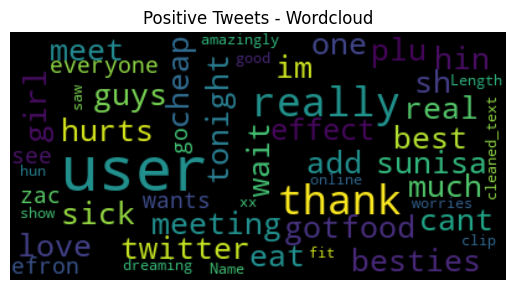

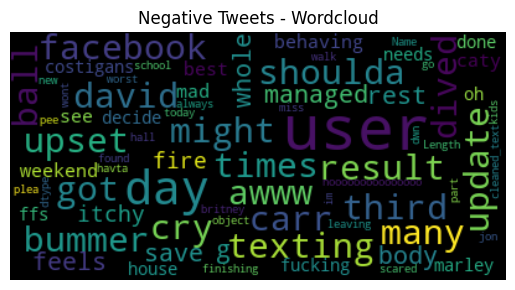

In [6]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stop_words = list(STOPWORDS)
# Wordcloud with positive tweets
positive_tweets = df['cleaned_text'][df["target"] == 'Positive']
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = df['cleaned_text'][df["target"] == 'Negative']
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis

In [7]:
#Rule-based sentiment analysis

from textblob import TextBlob
from sklearn.metrics import accuracy_score

def getPolarity(text): #function to get polarity 
    return TextBlob(text).sentiment.polarity

def getAnalysis(score): #function to convert polarity score to 'Negative' or 'Positive' results only
  if score <= 0:
    return 'Negative'
    
  else:
    return 'Positive'

df['Polarity_TextBlob'] = df['text'].apply(getPolarity) #create a polarity column in test set
df['Prediction_TextBlob'] = df['Polarity_TextBlob'].apply(getAnalysis) #create a prediction column based on TextBlob in test set

print(df.head(5))
accuracy_score(df['Prediction_TextBlob'],df['target']) #calculate the accuracy score

     target                                               text  \
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  Negative  is upset that he can't update his Facebook by ...   
2  Negative  @Kenichan I dived many times for the ball. Man...   
3  Negative    my whole body feels itchy and like its on fire    
4  Negative  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  Polarity_TextBlob  \
0  user awww bummer shoulda got david carr third day           0.216667   
1  upset update facebook texting might cry result...           0.000000   
2  user dived many times ball managed save rest g...           0.500000   
3                   whole body feels itchy like fire           0.200000   
4                              user behaving mad see          -0.625000   

  Prediction_TextBlob  
0            Positive  
1            Negative  
2            Positive  
3            Positive  
4            Negative  


0.6212333333333333

In [8]:
#Custome models

#TF-IDF Vectorizer
from matplotlib import transforms
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

unique_words = set(' '.join(df['cleaned_text']).split())
length = round(len(unique_words)/10)

vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = length) #make Tfidf Vectorizer
df_fit = vectorizer.fit_transform(df['cleaned_text'])

df_transformed = pd.DataFrame(df_fit.toarray(), columns=vectorizer.get_feature_names_out(50000))
df_combine = pd.concat([df,df_transformed], axis=1)
df_final = df_combine.drop(columns=['target','text', 'cleaned_text','Polarity_TextBlob','Prediction_TextBlob'])


In [24]:
print(df_final.head(5))

   able  able get  absolutely  abt   ac  access  accident  accidentally  \
0   0.0       0.0         0.0  0.0  0.0     0.0       0.0           0.0   
1   0.0       0.0         0.0  0.0  0.0     0.0       0.0           0.0   
2   0.0       0.0         0.0  0.0  0.0     0.0       0.0           0.0   
3   0.0       0.0         0.0  0.0  0.0     0.0       0.0           0.0   
4   0.0       0.0         0.0  0.0  0.0     0.0       0.0           0.0   

   according  account  ...  yucky  yum  yummy  yup  zac  zac efron  zero  \
0        0.0      0.0  ...    0.0  0.0    0.0  0.0  0.0        0.0   0.0   
1        0.0      0.0  ...    0.0  0.0    0.0  0.0  0.0        0.0   0.0   
2        0.0      0.0  ...    0.0  0.0    0.0  0.0  0.0        0.0   0.0   
3        0.0      0.0  ...    0.0  0.0    0.0  0.0  0.0        0.0   0.0   
4        0.0      0.0  ...    0.0  0.0    0.0  0.0  0.0        0.0   0.0   

   zombie  zone  zoo  
0     0.0   0.0  0.0  
1     0.0   0.0  0.0  
2     0.0   0.0  0.0  


In [9]:
#Split the dataset into train and set (ratio: 80:20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, sentiment, test_size = 0.2, random_state = 42)

In [10]:
#function to evaluate the models

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

    Negative       0.75      0.74      0.74      5909
    Positive       0.75      0.76      0.76      6091

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



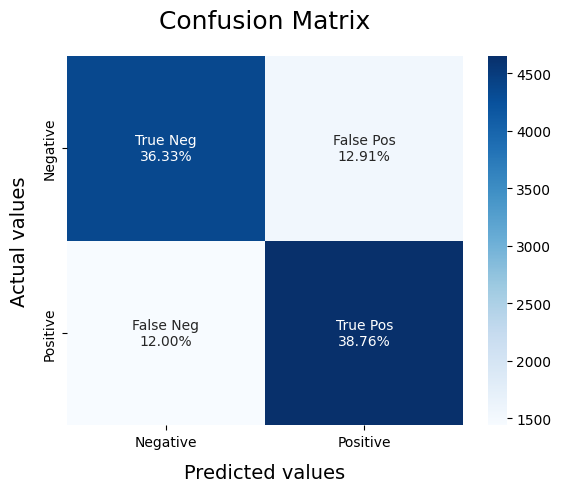

In [11]:
#Bernoulli Naive Bayes (BernoulliNB)
from sklearn.naive_bayes import BernoulliNB

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.74      5909
    Positive       0.74      0.77      0.76      6091

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



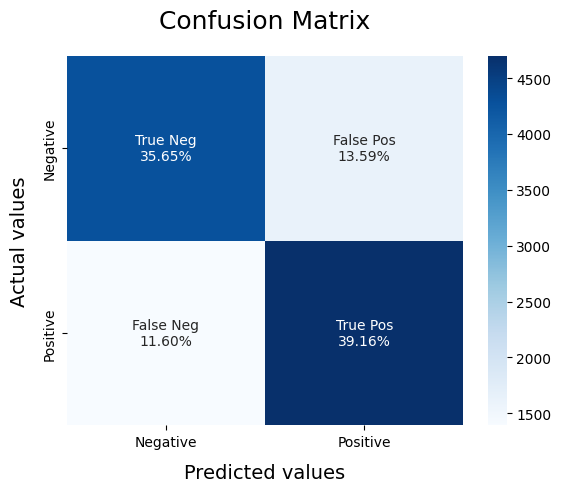

In [12]:
#LinearSVC Model
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

    Negative       0.76      0.73      0.75      5909
    Positive       0.75      0.77      0.76      6091

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



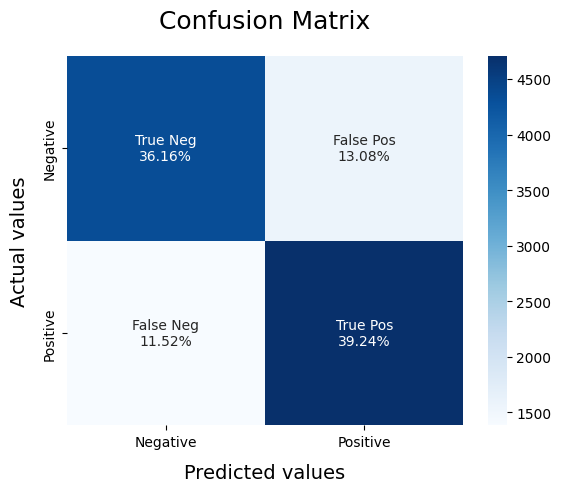

In [13]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

# Predict tweets from the chosen topic on Twitter

In [14]:
#use the models

#retrieve data from Twitter
import tweepy
import configparser

#read configs

config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

#authentication

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#check connection
public_tweets = api.home_timeline()

print(public_tweets[0].created_at)

2022-11-05 12:14:21+00:00


In [15]:
#retrieve recent tweets that contain given keyword (hashtag) without retweets
import pandas as pd

query = '#TaylorSwiftMidnights'
query = query + ' -filter:retweets'
language = "en" # Language code (follows ISO 639-1 standards)

results = tweepy.Cursor(api.search_tweets,
                           q=query,
                           lang=language).items(10000)

#store retrieved data as csv file using pandas
columns = ['Time','User','Tweet']
data = []

for tweet in results:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.text])

df_new = pd.DataFrame(data,columns = columns)
df_new.to_csv('tweets.csv')

In [16]:
df_new['cleaned_text']= clean_text(list(df_new['Tweet'])) #create a new column with cleaned tweet
unique_words_new = set(' '.join(df_new['cleaned_text']).split())
length_new = round(len(unique_words)/10) -2

vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = length_new) #make Tfidf Vectorizer
df_fit_new = vectorizer.fit_transform(df_new['cleaned_text'])

df_transformed_new = pd.DataFrame(df_fit_new.toarray(), columns=vectorizer.get_feature_names_out(50000))
df_combine_new = pd.concat([df_new,df_transformed_new], axis=1)

print(df_combine_new.head(5))

df_final_new = df_combine_new.drop(columns=['Time','User', 'Tweet','cleaned_text']) #drop string columns that models cannot use to process
print(df_final_new.head(5))

                       Time          User  \
0 2022-11-09 04:39:45+00:00     MelZalman   
1 2022-11-09 04:37:35+00:00     giannaJMA   
2 2022-11-09 04:15:37+00:00  AllTooDrew13   
3 2022-11-09 04:03:29+00:00       XuaniAb   
4 2022-11-09 03:45:41+00:00   alfamshakya   

                                               Tweet  \
0  These songs following each other has been my u...   
1  taylor i’m begging IM BEGGING for long live on...   
2  It's me, hi, I'm the lady that acid etches the...   
3  And I never think of him\nExcept on midnights ...   
4  Reading Murakami or Tolstoy would leave me in ...   

                                        cleaned_text   aa  able  able get  \
0  songs following undoing taylorswiftmidnights t...  0.0   0.0       0.0   
1  taylor begging im begging long live tour pleas...  0.0   0.0       0.0   
2  hi lady acid etches taylor swift wine glasses ...  0.0   0.0       0.0   
3  never think except midnights like taylorswiftm...  0.0   0.0       0.0   
4  read

In [17]:
sentiment = LRmodel.predict(df_final_new) #predict the dataset with Logistic Regression model

data = []
for text, pred in zip(df_new['Tweet'], sentiment):
    data.append((text,pred))
    
# Convert the list into a Pandas DataFrame.
df_predict = pd.DataFrame(data, columns = ['Tweet','sentiment'])
print(df_predict.head(3))

                                               Tweet sentiment
0  These songs following each other has been my u...  Positive
1  taylor i’m begging IM BEGGING for long live on...  Negative
2  It's me, hi, I'm the lady that acid etches the...  Positive


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- aa
- able get tickets
- able go
- able make
- absolute
- ...
Feature names seen at fit time, yet now missing:
- ac
- access
- accident
- accidentally
- according
- ...

  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Distribution of tweets related Taylor Swift new album Midnights')

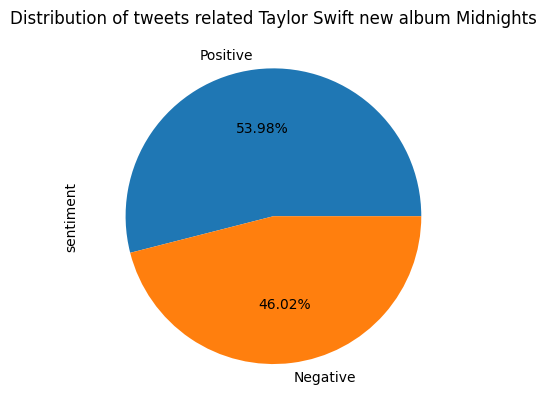

In [23]:
df_predict['sentiment'].value_counts().plot(kind='pie', autopct= '%1.2f%%').set_title('Distribution of tweets related Taylor Swift new album Midnights')